# Analysis of the American Time Use Survey Dataset
## Getting Initialized and Reading in the Data

In [100]:
import datetime as dt
import locale
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

In [3]:
summary = pd.read_csv('data/atussum_2014.dat')
summary = summary.rename(columns={'tucaseid': 'TUCASEID'})

In [4]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 11591
Columns: 409 entries, TUCASEID to t500107
dtypes: float64(1), int64(408)
memory usage: 36.3 MB


* TUFINLWGT = statistical weight of respondent
* TRYHHCHILD = age of youngest child in household
* TEAGE - age
* TESEX - sex
* TELFS - working status of respondent
* TRCHILDNUM - number of children in household

Lookup in atusintcodebk

In [5]:
summary.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,-1,-1,2,-1,2,1,-1,1,1,-1,1,0,-1,150,1145,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
# Households 
summary[summary.TRCHILDNUM == 0].head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,780,0,60,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350,0,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
activity = pd.read_csv('data/atusact_2014.dat')
activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223249 entries, 0 to 223248
Data columns (total 29 columns):
TUCASEID        223249 non-null int64
TUACTIVITY_N    223249 non-null int64
TEWHERE         223249 non-null int64
TRTCCTOT_LN     223249 non-null int64
TRTCC_LN        223249 non-null int64
TRTCOC_LN       223249 non-null int64
TRTEC_LN        223249 non-null int64
TRTHH_LN        223249 non-null int64
TRTNOHH_LN      223249 non-null int64
TRTOHH_LN       223249 non-null int64
TRTONHH_LN      223249 non-null int64
TRTO_LN         223249 non-null int64
TUACTDUR        223249 non-null int64
TUACTDUR24      223249 non-null int64
TUCC5           223249 non-null int64
TUCC5B          223249 non-null int64
TUCC7           223249 non-null int64
TUCC8           223249 non-null int64
TUCUMDUR        223249 non-null int64
TUCUMDUR24      223249 non-null int64
TUEC24          223249 non-null int64
TUSTARTTIM      223249 non-null object
TUSTOPTIME      223249 non-null object
TUTIER1CODE  

In [8]:
activity.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20140101140007,1,-1,0,0,0,-1,0,-1,0,-1,0,540,540,1,0,0,97,540,540,-1,04:00:00,13:00:00,1,1,1,10101,101,0
1,20140101140007,2,1,0,0,0,-1,0,-1,0,-1,0,30,30,1,0,0,0,570,570,-1,13:00:00,13:30:00,3,1,1,30101,301,0
2,20140101140007,3,-1,60,60,0,-1,60,-1,60,-1,60,60,60,1,0,0,0,630,630,-1,13:30:00,14:30:00,1,2,1,10201,102,0
3,20140101140007,4,13,10,10,0,-1,10,-1,10,-1,10,10,10,1,0,0,0,640,640,-1,14:30:00,14:40:00,18,11,1,181101,1811,0
4,20140101140007,5,4,30,30,0,-1,30,-1,30,-1,30,30,30,1,0,0,0,670,670,-1,14:40:00,15:10:00,11,1,1,110101,1101,0


In [9]:
sum_act = pd.merge(summary, activity)
sum_act.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20140101140007,4891315.82676,0,20,2,39,1,1,1,4,-1,-1,2,-1,2,1,-1,1,1,-1,1,0,-1,150,1145,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [10]:
len(sum_act[sum_act.TRCHILDNUM == 0]['TUCASEID'].unique())

6703

Note that `activities` has multiple lines for each `TUCASEID`, so **`sum_act` has a lot of duplicated info**; must use `.unique()` to get to desired results.

In [11]:
sum_act[sum_act.TUCASEID == 20140101140007][['TEAGE']]

,TEAGE
0,20
1,20
2,20
3,20
4,20
5,20
6,20
7,20
8,20
9,20


In [26]:
resp = pd.read_csv('data/atusresp_2014.dat', parse_dates=['TUDIARYDATE'])
resp[['TUDIARYDATE']].head()

,TUDIARYDATE
0,2014-01-26
1,2014-01-30
2,2014-01-27
3,2014-01-26
4,2014-01-29


# Laundry

Number of minutes spent doing laundry for those who did laundry. Shown as total, then broken out by:
* sex
    * further breakdown by sex of employed only
* children in household status

In [12]:
laundry = summary[summary['t020102'] > 0]
laundry_mean = laundry['t020102'].mean()
laundry_mean

67.028625954198475

In [13]:
len(laundry['TUCASEID'].unique())

2096

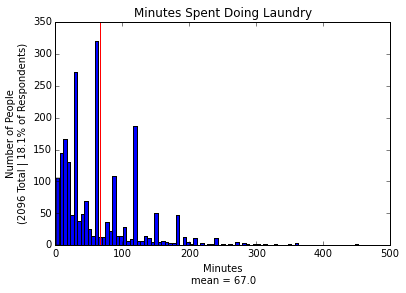

In [120]:
laundry['t020102'].plot(kind='hist', bins=90, 
                        title='Minutes Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_mean))
plt.ylabel('Number of People\n({} Total | {:.1f}% of Respondents)'.format(len(laundry),
                                                                          (len(laundry)*100/len(summary))))
ymin, ymax = plt.ylim()
plt.vlines(laundry_mean, 0, ymax, color='red')
plt.show()

In [109]:
laundry_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry)
laundry_dow.index = laundry_dow['TUDIARYDATE']

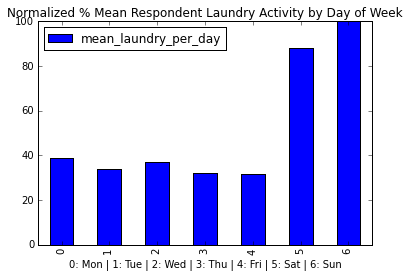

In [113]:
laundry_by_day = laundry_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_by_day['weekday'] = laundry_by_day.index.weekday
laundry_means_by_day = [laundry_by_day[laundry_by_day['weekday'] == x].mean()[0] for x in range(7)]
laundry_max = max(laundry_means_by_day)
laundry_means_by_day = [laundry_means_by_day[x]*100/laundry_max for x in range(7)]
pd.DataFrame(laundry_means_by_day).rename(columns={0: 'mean_laundry_per_day'}) \
                                  .plot(kind='bar',
                                        title= 'Normalized % Mean Respondent Laundry Activity by Day of Week')
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

Weekend days are more popular for doing laundry than weekdays.

### Laundry by Sex

In [17]:
laundry_women      = laundry[laundry.TESEX == 2]
laundry_women_mean = laundry_women['t020102'].mean()
laundry_men        = laundry[laundry.TESEX == 1]
laundry_men_mean   = laundry_men['t020102'].mean()

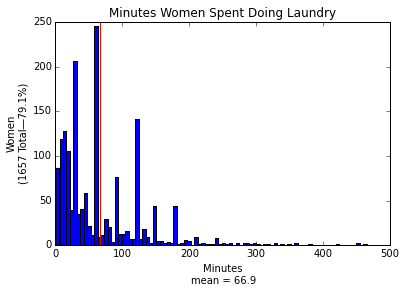

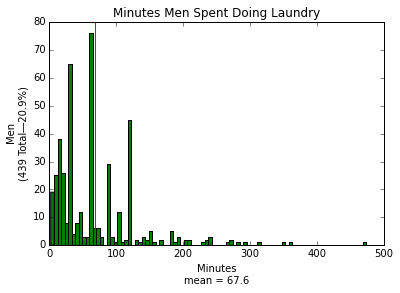

In [122]:
laundry_women['t020102'].plot(kind='hist', bins=90, 
                              title='Minutes Women Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_women_mean))
plt.ylabel('Women\n({} Total—{:.1f}%)'.format(len(laundry_women), (len(laundry_women)*100/len(laundry))))
ymin, ymax = plt.ylim()
plt.vlines(laundry_women_mean, 0, ymax, color='red')
plt.show()

laundry_men['t020102'].plot(kind='hist', bins=90, 
                            title='Minutes Men Spent Doing Laundry',
                            color='g')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_men_mean))
plt.ylabel('Men\n({} Total—{:.1f}%)'.format(len(laundry_men), (len(laundry_men)*100/len(laundry))))
ymin, ymax = plt.ylim()
plt.vlines(laundry_men_mean, 0, ymax, color='red')
plt.show()

In [19]:
laundry_women['t020102'].describe()

count    1657.000000
mean       66.886542
std        62.556577
min         1.000000
25%        20.000000
50%        50.000000
75%        90.000000
max       465.000000
Name: t020102, dtype: float64

In [20]:
laundry_men['t020102'].describe()

count    439.000000
mean      67.564920
std       62.321488
min        2.000000
25%       25.000000
50%       60.000000
75%       90.000000
max      473.000000
Name: t020102, dtype: float64

In [87]:
laundry_w_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry_women)
laundry_w_dow.index = laundry_w_dow['TUDIARYDATE']
laundry_m_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry_men)
laundry_m_dow.index = laundry_m_dow['TUDIARYDATE']

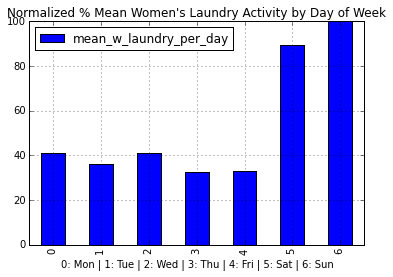

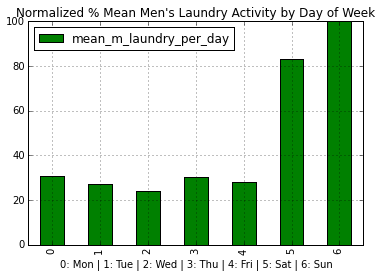

In [127]:
laundry_w_by_day = laundry_w_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_w_by_day['weekday'] = laundry_w_by_day.index.weekday
laundry_w_means_by_day = [laundry_w_by_day[laundry_w_by_day['weekday'] == x].mean()[0] for x in range(7)]
laundry_w_max = max(laundry_w_means_by_day)
laundry_w_means_by_day = [laundry_w_means_by_day[x]*100/laundry_w_max for x in range(7)]
pd.DataFrame(laundry_w_means_by_day).rename(columns={0: 'mean_w_laundry_per_day'}) \
                                  .plot(kind='bar',
                                        title= "Normalized % Mean Women's Laundry Activity by Day of Week",
                                        grid=True)
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

laundry_m_by_day = laundry_m_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_m_by_day['weekday'] = laundry_m_by_day.index.weekday
laundry_m_means_by_day = [laundry_m_by_day[laundry_m_by_day['weekday'] == x].mean()[0] for x in range(7)]
laundry_m_max = max(laundry_m_means_by_day)
laundry_m_means_by_day = [laundry_m_means_by_day[x]*100/laundry_m_max for x in range(7)]
pd.DataFrame(laundry_m_means_by_day).rename(columns={0: 'mean_m_laundry_per_day'}) \
                                  .plot(kind='bar',
                                        title= "Normalized % Mean Men's Laundry Activity by Day of Week",
                                        color='g',
                                        grid=True)
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

A higher proportion of men do laundry on weekends than do women.

### Laundry by Sex, Employed Only

In [114]:
# Select working men and women
laundry_ww_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry_women[laundry_women['TELFS'] <= 2])
laundry_ww_dow.index = laundry_ww_dow['TUDIARYDATE']
laundry_wm_dow = pd.merge(resp[['TUCASEID', 'TUDIARYDATE']], laundry_men[laundry_men['TELFS'] <= 2])
laundry_wm_dow.index = laundry_wm_dow['TUDIARYDATE']

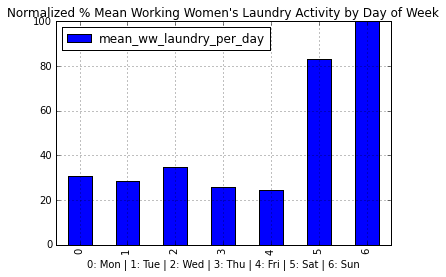

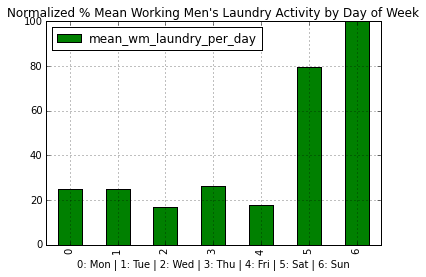

In [131]:
laundry_ww_by_day = laundry_ww_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_ww_by_day['weekday'] = laundry_ww_by_day.index.weekday
laundry_ww_means_by_day = [laundry_ww_by_day[laundry_ww_by_day['weekday'] == x].mean()[0] for x in range(7)]
laundry_ww_max = max(laundry_ww_means_by_day)
laundry_ww_means_by_day = [laundry_ww_means_by_day[x]*100/laundry_ww_max for x in range(7)]
pd.DataFrame(laundry_ww_means_by_day).rename(columns={0: 'mean_ww_laundry_per_day'}) \
                                  .plot(kind='bar',
                                        title= "Normalized % Mean Working Women's Laundry Activity by Day of Week",
                                        grid=True)
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

laundry_wm_by_day = laundry_wm_dow['TUDIARYDAY'].resample('d', how=['count'])
laundry_wm_by_day['weekday'] = laundry_wm_by_day.index.weekday
laundry_wm_means_by_day = [laundry_wm_by_day[laundry_wm_by_day['weekday'] == x].mean()[0] for x in range(7)]
laundry_wm_max = max(laundry_wm_means_by_day)
laundry_wm_means_by_day = [laundry_wm_means_by_day[x]*100/laundry_wm_max for x in range(7)]
pd.DataFrame(laundry_wm_means_by_day).rename(columns={0: 'mean_wm_laundry_per_day'}) \
                                  .plot(kind='bar',
                                        title= "Normalized % Mean Working Men's Laundry Activity by Day of Week",
                                        color='g',
                                        grid=True)
plt.xlabel('0: Mon | 1: Tue | 2: Wed | 3: Thu | 4: Fri | 5: Sat | 6: Sun')
plt.show()

When we select just employed people, the relative laundry activity by both sexes during the weekdays decreases significantly.

### Laundry by Children in House Status

In [21]:
laundry_parents          = laundry[laundry['TRCHILDNUM'] > 0]
laundry_parents_mean     = laundry_parents['t020102'].mean()
laundry_non_parents      = laundry[laundry['TRCHILDNUM'] == 0]
laundry_non_parents_mean = laundry_non_parents['t020102'].mean()

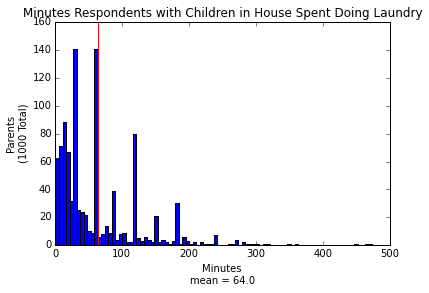

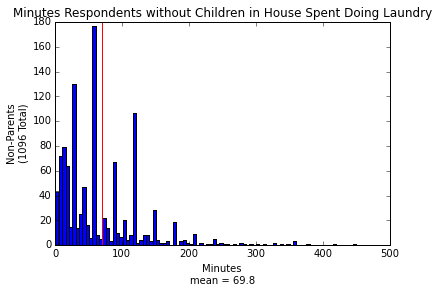

In [118]:
laundry_parents['t020102'].plot(kind='hist', bins=90, 
                                title='Minutes Respondents with Children in House Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_parents_mean))
plt.ylabel('Parents\n({} Total)'.format(len(laundry_parents)))
ymin, ymax = plt.ylim()
plt.vlines(laundry_parents_mean, 0, ymax, color='red')
plt.show()

laundry_non_parents['t020102'].plot(kind='hist', bins=90, 
                                    title='Minutes Respondents without Children in House Spent Doing Laundry')
plt.xlabel('Minutes\nmean = {:.1f}'.format(laundry_non_parents_mean))
plt.ylabel('Non-Parents\n({} Total)'.format(len(laundry_non_parents)))
ymin, ymax = plt.ylim()
plt.vlines(laundry_non_parents_mean, 0, ymax, color='red')
plt.show()

In [23]:
laundry_parents['t020102'].describe()

count    1000.000000
mean       63.980000
std        63.551274
min         1.000000
25%        20.000000
50%        40.000000
75%        90.000000
max       473.000000
Name: t020102, dtype: float64

In [24]:
laundry_non_parents['t020102'].describe()

count    1096.000000
mean       69.810219
std        61.408911
min         1.000000
25%        28.000000
50%        60.000000
75%       100.000000
max       450.000000
Name: t020102, dtype: float64

## Laundry Summary

**18.1%** of all respondents did laundry on their diary day, spending **~67 minutes** on the task.

### Laundry by Sex

**Women** did the vast majority of the laundry: **79.1%** compared to **20.9%** by **men**. The mean time spent doing laundry was **66.9 minutes for women** and **67.6 minutes for men**; they are spending almost the same amount of time doing the job. **Saturday and Sunday** were by far the most popular days on which to do laundry. For employed men and women, this trend was even stronger.


### Laundry by Children in House Status
People without children in the house spend nearly 5 minutes more on average doing laundry. The mean time spent doing laundry was **64.0 minutes for respondents with children in their house** and **69.8 minutes for households without children**. This is an interesting fact, given that having children in the house increases the amount of clothes that need washing. Perhaps the people in households without children have a more leisurely pace.


# Dishes

Number of minutes spent doing the kitchen and food clean-up.

In [133]:
dishes = summary[summary['t020203'] > 0]
dishes_mean = dishes['t020203'].mean()
dishes_mean

33.536849710982658

In [134]:
len(dishes.TUCASEID.unique())

2768

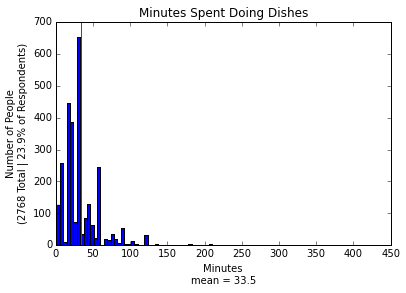

In [135]:
dishes['t020203'].plot(kind='hist', bins=90, 
                        title='Minutes Spent Doing Dishes')
plt.xlabel('Minutes\nmean = {:.1f}'.format(dishes_mean))
plt.ylabel('Number of People\n({} Total | {:.1f}% of Respondents)'.format(len(dishes),
                                                                          (len(dishes)*100/len(summary))))
ymin, ymax = plt.ylim()
plt.vlines(dishes_mean, 0, ymax, color='red')
plt.show()

I am surprised that only **23.9%** of respondents did dishes on their diary day.

In [139]:
dishes_women      = dishes[dishes.TESEX == 2]
dishes_women_mean = dishes_women['t020203'].mean()
dishes_men        = dishes[dishes.TESEX == 1]
dishes_men_mean   = dishes_men['t020203'].mean()

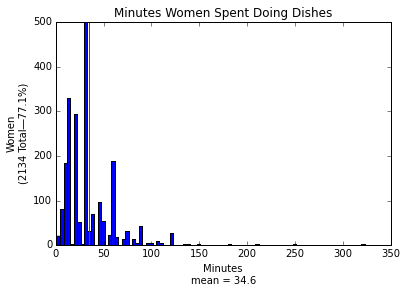

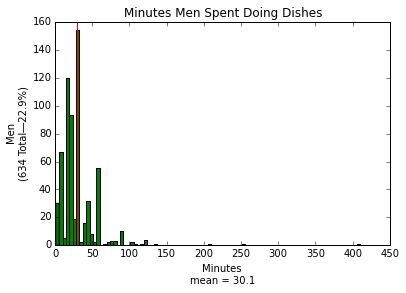

In [140]:
dishes_women['t020203'].plot(kind='hist', bins=90, 
                              title='Minutes Women Spent Doing Dishes')
plt.xlabel('Minutes\nmean = {:.1f}'.format(dishes_women_mean))
plt.ylabel('Women\n({} Total—{:.1f}%)'.format(len(dishes_women), (len(dishes_women)*100/len(dishes))))
ymin, ymax = plt.ylim()
plt.vlines(dishes_women_mean, 0, ymax, color='red')
plt.show()

dishes_men['t020203'].plot(kind='hist', bins=90, 
                            title='Minutes Men Spent Doing Dishes',
                            color='g')
plt.xlabel('Minutes\nmean = {:.1f}'.format(dishes_men_mean))
plt.ylabel('Men\n({} Total—{:.1f}%)'.format(len(dishes_men), (len(dishes_men)*100/len(dishes))))
ymin, ymax = plt.ylim()
plt.vlines(dishes_men_mean, 0, ymax, color='red')
plt.show()

I am surprised that more men are not doing dishes. I wonder if younger married men are doing more dishes than the above.

# Motorsports

In [25]:
# Number of people who watched motorsports
len(summary[summary.t130226 > 0]['t130226'])

2

In [27]:
f1dates = resp[(resp['TUDIARYDATE'] ==  dt.date(2014, 3, 16)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 3, 30)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 4, 6))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 4, 20)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 5, 11)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 5, 25)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 6, 8))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 6, 22)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 6))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 20)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 7, 27)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 8, 24)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 9, 7))  | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 9, 21)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 10, 5)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 10, 12))| \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 2)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 9)) | \
               (resp['TUDIARYDATE'] ==  dt.date(2014, 11, 23))]

The above narrows down to just dates on which 2014 F1 races took place

In [28]:
sum_act_resp = pd.merge(sum_act, resp)

In [29]:
sum_act_resp.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,TEERNPER,TEERNRT,TEERNUOT,TEERNWKP,TEHRFTPT,TEHRUSL1,TEHRUSL2,TEIO1COW,TEIO1ICD,TEIO1OCD,TELAYAVL,TELAYLK,TELKAVL,TELKM1,TERET1,TESCHFT,TESPUHRS,TRDTIND1,TRDTOCC1,TRERNHLY,TRERNUPD,TRHERNAL,TRHHCHILD,TRIMIND1,TRMJIND1,TRMJOCC1,TRMJOCGR,TRNHHCHILD,TRNUMHOU,TROHHCHILD,TRTALONE,TRTALONE_WK,TRTCC,TRTCCC,TRTCCC_WK,TRTCCTOT,TRTCHILD,TRTCOC,TRTFAMILY,TRTFRIEND,TRTHHFAMILY,TRTNOCH

In [30]:
f1possible = pd.merge(summary, f1dates)

In [31]:
len(f1possible[f1possible.t130226 > 0])

0

I am a fan of F1 racing and would love to understand more about other F1 fans, but unfortunately, only two people watched motorsports and neither watched motor racing on any of the days that F1 races took place.